In [1]:
import pandas  as pd
from feature_selector import FeatureSelector
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')

train_labels = data.satisfied
train = data.drop(columns=['satisfied', 'id'])

fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.5,    
                                    'correlation_threshold': 0.8, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})

#test_data = pd.read_csv('test.csv')
#test_data_select = test_data[selected_features]

/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,4,6,10,12,18,24,35,56,57,65,85,86,87,88,89,98,99,100,105,124,125,126,127,128,130,131,133,166,171,172,192,193,194,195,204,205,206,207,228,229,230,240,256,257,258,259,260,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


9 features with greater than 0.50 missing values.

0 features with a single unique value.

1 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.892618	valid_0's binary_logloss: 0.413811
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.892447	valid_0's binary_logloss: 0.414802
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.892232	valid_0's binary_logloss: 0.414227
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[231]	valid_0's auc: 0.88783	valid_0's binary_logloss: 0.421974
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[231]	valid_0's auc: 0.900122	valid_0's binary_logloss: 0.400742
Traini

In [79]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = False)

train_new = train[list(train_removed_all_once.columns)]

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 6080 features including one-hot features.


In [80]:
selected_features = train_new.columns
test_data = pd.read_csv('test.csv')
test_data_select = test_data[selected_features]

/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,6,10,12,21,24,35,85,87,88,89,100,124,126,127,128,130,131,133,166,172,177,193,194,195,205,206,207,220,222,228,229,230,240,257,258,260,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
test_data_select.insert(0,'index', range(train_new.shape[0], train_new.shape[0]+test_data_select.shape[0]))
test_data_select

,index,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v260,v263,v264,v265,v266,v267,v268,v269,v270,cntry
0,30080,0,1,63,15020,.a,2,2,1,2,...,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT
1,30081,5,2,44,21070,21070,1,2,2,1,...,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT
2,30082,10,2,21,11010,11010,2,1,2,2,...,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT
3,30083,2,2,75,11010,.a,2,2,2,2,...,NaN,1946,.a,.a,.a,.a,.a,.a,NaN,AT
4,30084,0,1,22,11010,11010,2,2,2,2,...,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9240,39320,0,2,27,14120,.a,2,2,2,2,...,.a,1985,2010,2014,.a,.a,.a,.a,.a,SI
9241,39321,1,3,82,14120,.a,2,2,2,2,...,.a,1935,.a,.a,.a,.a,.a,.a,.a,SI
9242,39322,5,1,41,14120,.a,2,2,2,2,...,.a,1971,1998,2001,.a,.a,.a,.a,.a,SI
9243,39323,8,1,19,14120,.a,2,1,2,1,...,.a,1969,1974,.a,.a,.a,.a,.a,.a,SI


In [82]:
train_new.insert(0,'index', range(train_new.shape[0]))
train_new

,index,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v260,v263,v264,v265,v266,v267,v268,v269,v270,cntry
0,0,2,2,74,11010,.a,2,2,2,2,...,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT
1,1,4,2,58,11010,.a,2,2,2,2,...,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT
2,2,6,2,47,11010,11010,2,2,1,2,...,NaN,1963,1993,1995,.a,.a,.a,.a,NaN,AT
3,3,10,2,22,11010,.a,2,2,2,2,...,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT
4,4,0,1,24,11010,.a,2,2,2,2,...,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30075,30075,0,1,72,14120,.a,2,2,2,2,...,.a,1945,.a,.a,.a,.a,.a,.a,.a,SI
30076,30076,0,1,38,14120,.a,2,2,2,2,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,SI
30077,30077,5,2,49,14120,.a,2,2,2,2,...,.a,1967,1990,1993,.a,.a,.a,.a,.a,SI
30078,30078,0,1,16,14120,.a,2,2,2,2,...,.a,1972,1971,.a,.a,.a,.a,.a,.a,SI


In [83]:
train_test_combinded = pd.concat([train_new, test_data_select])

In [84]:
for column in train_test_combinded.columns:
    train_test_combinded[column].fillna(train_test_combinded[column].mode()[0], inplace=True)

In [85]:
temp = train_test_combinded.drop('index',1)

In [86]:
temp=temp.astype(object)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39325 entries, 0 to 9244
Columns: 244 entries, v1 to cntry
dtypes: object(244)
memory usage: 73.5+ MB


In [98]:
temp

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v260,v263,v264,v265,v266,v267,v268,v269,v270,cntry
0,2,2,74,11010,.a,2,2,2,2,1,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,AT
1,4,2,58,11010,.a,2,2,2,2,1,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,AT
2,6,2,47,11010,11010,2,2,1,2,1,...,.a,1963,1993,1995,.a,.a,.a,.a,.a,AT
3,10,2,22,11010,.a,2,2,2,2,1,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,AT
4,0,1,24,11010,.a,2,2,2,2,1,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9240,0,2,27,14120,.a,2,2,2,2,1,...,.a,1985,2010,2014,.a,.a,.a,.a,.a,SI
9241,1,3,82,14120,.a,2,2,2,2,1,...,.a,1935,.a,.a,.a,.a,.a,.a,.a,SI
9242,5,1,41,14120,.a,2,2,2,2,1,...,.a,1971,1998,2001,.a,.a,.a,.a,.a,SI
9243,8,1,19,14120,.a,2,1,2,1,1,...,.a,1969,1974,.a,.a,.a,.a,.a,.a,SI


In [97]:
sum(temp.count() < 39325)

0

# One-hot + 正则化

In [87]:
lol = temp.values.tolist()

In [99]:
from sklearn import preprocessing


# 1. INSTANTIATE
#categories = list(temp.columns)
#enc = preprocessing.OneHotEncoder(categories=categories, sparse=False, handle_unknown='ignore')
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')


In [101]:
# 2. FIT
enc.fit(temp)


TypeError: argument must be a string or number

In [ ]:

# 3. Transform
onehotlabels = enc.transform(lol).toarray()
onehotlabels.shape


# dummy

In [9]:
train_test_combinded_dummy = pd.get_dummies(train_test_combinded)

In [10]:
train_test_combinded_dummy = train_test_combinded_dummy.reset_index()

In [11]:
train_test_combinded_dummy

,level_0,index,v27,v30,v31,v36,v37,v38,v42,v46,...,cntry_HU,cntry_IE,cntry_IL,cntry_LT,cntry_NL,cntry_NO,cntry_PL,cntry_PT,cntry_SE,cntry_SI
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39320,9240,39320,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39321,9241,39321,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
39322,9242,39322,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
39323,9243,39323,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [12]:
X = train_test_combinded_dummy[:30080]

In [13]:
train_test_combinded_dummy.loc[30080]

level_0         0.0
index       30080.0
v27             0.0
v30             1.0
v31             0.0
             ...   
cntry_NO        0.0
cntry_PL        0.0
cntry_PT        0.0
cntry_SE        0.0
cntry_SI        0.0
Name: 30080, Length: 6825, dtype: float64

In [14]:
X.shape

(30080, 6825)

In [15]:
X

,level_0,index,v27,v30,v31,v36,v37,v38,v42,v46,...,cntry_HU,cntry_IE,cntry_IL,cntry_LT,cntry_NL,cntry_NO,cntry_PL,cntry_PT,cntry_SE,cntry_SI
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30075,30075,30075,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
30076,30076,30076,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
30077,30077,30077,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
30078,30078,30078,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
test = train_test_combinded_dummy[30080:]

## 开始 Train

In [18]:
from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
result = next(kf.split(X), None)
result1 = next(kf.split(train_labels), None)


X_train = X.iloc[result[0]]
y_train =  train_labels.iloc[result1[0]]
X_test = X.iloc[result[1]]
y_test =  train_labels.iloc[result1[1]]

In [19]:
import time
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


params = {'boosting_type': 'gbdt',
          'num_leaves': 80, #结果对最终效果影响较大，越大值越好，太大会出现过拟合
          'min_data_in_leaf': 30,
          'objective': 'binary', #定义的目标函数
          'max_depth': -1,
          'learning_rate': 0.05,
          "min_sum_hessian_in_leaf": 6,
          "boosting": "gbdt",
          "feature_fraction": 0.9,  #提取的特征比率
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
          "lambda_l1": 0.1,             #l1正则
          # 'lambda_l2': 0.001,     #l2正则
          "verbosity": -1,
          "nthread": -1,                #线程数量，-1表示全部线程，线程越多，运行的速度越快
          'metric': {'binary_logloss', 'auc'},  ##评价函数选择
          "random_state": 2019, #随机数种子，可以防止每次运行的结果不一致
          # 'device': 'gpu' ##如果安装的事gpu版本的lightgbm,可以加快运算
          }

start = time.time()
lgb2 = lgb.train(train_set=train_data,
                      early_stopping_rounds=10,
                      num_boost_round=1000,
                      params=params,
                      valid_sets=test_data)
end = time.time()
print('lightgbm运行时间为{}秒'.format(round(end-start,0)))

[1]	valid_0's binary_logloss: 0.670827	valid_0's auc: 0.864184
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.652789	valid_0's auc: 0.873915
[3]	valid_0's binary_logloss: 0.637291	valid_0's auc: 0.874409
[4]	valid_0's binary_logloss: 0.621992	valid_0's auc: 0.875918
[5]	valid_0's binary_logloss: 0.608796	valid_0's auc: 0.876868
[6]	valid_0's binary_logloss: 0.596971	valid_0's auc: 0.878189
[7]	valid_0's binary_logloss: 0.585406	valid_0's auc: 0.879153
[8]	valid_0's binary_logloss: 0.575883	valid_0's auc: 0.880615
[9]	valid_0's binary_logloss: 0.565616	valid_0's auc: 0.880577
[10]	valid_0's binary_logloss: 0.55544	valid_0's auc: 0.881301
[11]	valid_0's binary_logloss: 0.546187	valid_0's auc: 0.881959
[12]	valid_0's binary_logloss: 0.53784	valid_0's auc: 0.882069
[13]	valid_0's binary_logloss: 0.530804	valid_0's auc: 0.882216
[14]	valid_0's binary_logloss: 0.523404	valid_0's auc: 0.882567
[15]	valid_0's binary_logloss: 0.517183	valid_0's auc:

[129]	valid_0's binary_logloss: 0.410426	valid_0's auc: 0.894384
[130]	valid_0's binary_logloss: 0.410189	valid_0's auc: 0.89448
[131]	valid_0's binary_logloss: 0.410234	valid_0's auc: 0.894412
[132]	valid_0's binary_logloss: 0.410335	valid_0's auc: 0.894359
[133]	valid_0's binary_logloss: 0.410202	valid_0's auc: 0.894423
[134]	valid_0's binary_logloss: 0.410225	valid_0's auc: 0.894414
[135]	valid_0's binary_logloss: 0.410258	valid_0's auc: 0.894349
[136]	valid_0's binary_logloss: 0.410267	valid_0's auc: 0.894297
[137]	valid_0's binary_logloss: 0.410244	valid_0's auc: 0.894345
[138]	valid_0's binary_logloss: 0.410478	valid_0's auc: 0.89419
[139]	valid_0's binary_logloss: 0.4104	valid_0's auc: 0.894229
[140]	valid_0's binary_logloss: 0.410582	valid_0's auc: 0.894118
Early stopping, best iteration is:
[130]	valid_0's binary_logloss: 0.410189	valid_0's auc: 0.89448
lightgbm运行时间为24.0秒


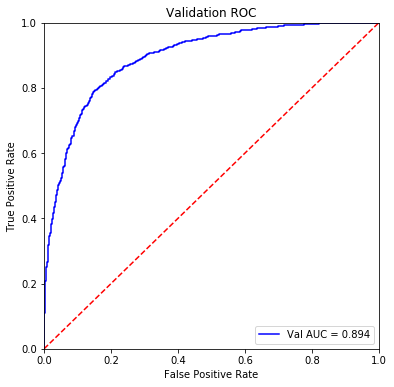

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt

lgb2_preds=lgb2.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, lgb2_preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score 
    
def fbeta(y_true, pred):
    # 调整阈值
    best_acc=0
    precision_recall = []
    best_thershold=0
    for thershold in [0.15,0.2, 0.25,0.3,0.4,0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49,0.5,0.52125, 0.525, 0.55, 0.6, 0.65, 0.7]:
        preds = [1 if i > thershold else 0 for i in pred]
        cur_acc = accuracy_score(y_test, preds)
        if cur_acc > best_acc:
            best_thershold = thershold
            best_acc = cur_acc
            print(best_acc)
    return 'best_thershold', best_thershold,True

In [22]:
fbeta(y_test, lgb2_preds)

0.7244015957446809
0.7539893617021277
0.7785904255319149
0.7908909574468085
0.8085106382978723
0.8118351063829787
0.816156914893617
0.8164893617021277
0.8184840425531915
0.8188164893617021


('best_thershold', 0.48, True)

In [23]:
test_preds=lgb2.predict(test)


In [24]:
test_preds

array([0.22373513, 0.12412992, 0.94663734, ..., 0.72673339, 0.801563  ,
       0.09097633])

In [25]:
thershold = 0.48
preds = [1 if i > thershold else 0 for i in test_preds]

In [26]:
test_data = pd.read_csv('test.csv')

test_data.insert(1,'Predicted', preds)
df['Predicted'] = preds

id_ = test_data['id']
test_data.insert(0,'Id', id_)
df = test_data[['Id', 'Predicted']]
df.to_csv('submission.csv',index=False)


/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,6,10,12,21,24,35,85,87,88,89,100,124,126,127,128,130,131,133,166,172,177,193,194,195,205,206,207,220,222,228,229,230,240,257,258,260,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NameError: name 'df' is not defined

In [ ]:
df

In [ ]:
train_new.to_csv('seleceted_train_features.csv')